In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg
from statistics import mean
from sklearn.metrics import accuracy_score

pd.options.mode.chained_assignment = None

In [53]:
df = pd.read_excel("Computer_Assignment_3_Data.xlsx", header=[0, 1])
print(df)
if (' ', 'Sample') in df.columns:
    df.drop(columns=[(' ', 'Sample')], inplace=True)
print(df.columns)

           ω1        ω2        ω3        ω4     
  Sample   x1   x2   x1   x2   x1   x2   x1   x2
0      1  0.1  1.1  7.1  4.2 -3.0 -2.9 -2.0 -8.4
1      2  6.8  7.1 -1.4 -4.3  0.5  8.7 -8.9  0.2
2      3 -3.5 -4.1  4.5  0.0  2.9  2.1 -4.2 -7.7
3      4  2.0  2.7  6.3  1.6 -0.1  5.2 -8.5 -3.2
4      5  4.1  2.8  4.2  1.9 -4.0  2.2 -6.7 -4.0
5      6  3.1  5.0  1.4 -3.2 -1.3  3.7 -0.5 -9.2
6      7 -0.8 -1.3  2.4 -4.0 -3.4  6.2 -5.3 -6.7
7      8  0.9  1.2  2.5 -6.1 -4.1  3.4 -8.7 -6.4
8      9  5.0  6.4  8.4  3.7 -5.1  1.6 -7.1 -9.7
9     10  3.9  4.0  4.1 -2.2  1.9  5.1 -8.0 -6.3
MultiIndex([('ω1', 'x1'),
            ('ω1', 'x2'),
            ('ω2', 'x1'),
            ('ω2', 'x2'),
            ('ω3', 'x1'),
            ('ω3', 'x2'),
            ('ω4', 'x1'),
            ('ω4', 'x2')],
           )


In [54]:
w1 = df.loc[:, 'ω1']
w1['label'] = 0
w2 = df.loc[:, 'ω2']
w2['label'] = 1
w3 = df.loc[:, 'ω3']
w3['label'] = 0
w4 = df.loc[:, 'ω4']
w4['label'] = 3

# Question 1

In [55]:
def MSE(real, pred):
    real = np.array(real)
    pred = np.array(pred)
    return np.mean((real - pred)**2)

In [56]:
def PerceptronNetwork(X, y, lr, epochs):
    errors = []
    W = np.zeros(X.shape[1] + 1) 
    
    X = np.hstack([X, np.ones((X.shape[0], 1))])
    for _ in range(epochs):
        z = X @ W
        grad = X.T @ (z - y)
        W -= lr * grad

        temp = X @ W
        predicted = (temp >= 0).astype(int)
        errors.append(MSE(y, predicted))

    return predicted, errors, W

## question one: part a

In [57]:
def select_dataset(subset):
    w1, w2 = subset

    w1_data = df.loc[:, w1]
    w1_data['label'] = 0

    w2_data = df.loc[:, w2]
    w2_data['label'] = 1

    X_train = pd.concat([w1_data.iloc[:, :-1], w2_data.iloc[:, :-1]]).to_numpy()
    y_train = pd.concat([w1_data.iloc[:, -1], w2_data.iloc[:, -1]]).to_numpy()

    return X_train, y_train

In [58]:
def plot_errors(errors, title):
    plt.xlabel('Epochs')
    plt.ylabel('MSE Error')
    plt.title(title)
    plt.plot(errors, color='plum')
    plt.show()

In [59]:
X_train, y_train = select_dataset(['ω1', 'ω2'])
shuffled_indices = np.random.permutation(len(X_train))
X_train = X_train[shuffled_indices]
y_train = y_train[shuffled_indices]

Predictions: [1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1]


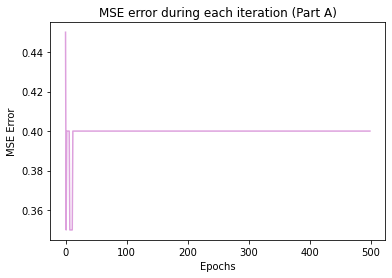

Error rate: 40.00%


In [60]:
output = PerceptronNetwork(X_train, y_train, lr=0.001, epochs=500)
print('Predictions:', output[0])
plot_errors(output[1], 'MSE error during each iteration (Part A)')
print(f'Error rate: {100 * (1 - accuracy_score(y_train, output[0])):.2f}%')

## question one: part B

In [61]:
X_train, y_train = select_dataset(['ω3', 'ω2'])
shuffled_indices = np.random.permutation(len(X_train))
X_train = X_train[shuffled_indices]
y_train = y_train[shuffled_indices]

Predictions: [0 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1]


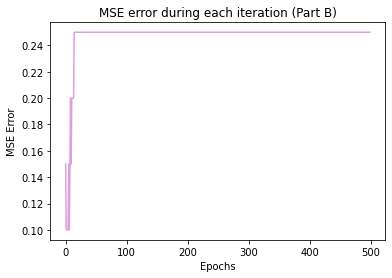

Error rate: 25.00%


In [62]:
output = PerceptronNetwork(X_train, y_train, lr=0.005, epochs=500)
print('Predictions:', output[0])
plot_errors(output[1], 'MSE error during each iteration (Part B)')
print(f'Error rate: {100 * (1 - accuracy_score(y_train, output[0])):.2f}%')

# Question 2: part a

In [63]:
def calculate_weights(X, y):
    return linalg.inv(X.T @ X) @ X.T @ y

In [64]:
X_train, y_train = select_dataset(['ω1', 'ω2'])
weights = calculate_weights(X_train, y_train)
print('Weights:', weights)

Weights: [ 0.19005967 -0.1529059 ]


In [43]:
predicted = (X_train @ weights >= 0).astype(int)
print(f'Error rate: {100 * (1 - accuracy_score(y_train, predicted)):.2f}%')

Error rate: 20.00%


## Question 2: Part b

In [66]:
X_train, y_train = select_dataset(['ω3', 'ω2'])
weights = calculate_weights(X_train, y_train)
print('Weights:', weights)

Weights: [ 0.12343884 -0.03158049]


In [67]:
predicted = (X_train @ weights >= 0).astype(int)
print(f'Error rate: {100 * (1 - accuracy_score(y_train, predicted)):.2f}%')

Error rate: 15.00%


# Question 3

In [7]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [8]:
def cost_function(weight, x, y):
    h = sigmoid(x @ weight)
    m = len(y)
    cost = 1 / m * np.sum(-y * np.log(h) - (1 - y) * np.log(1 - h))
    grad = 1 / m * ((y - h) @ x)
    return cost, grad

In [9]:
def train(x, y, learning_rate, epochs):
    x = np.append(x, np.ones([x.shape[0],1]), axis=1) 
   
    weights = [] 
    classes = np.unique(y)
    costs = np.zeros(epochs)

    for c in classes: 
        binary_y = np.where(y == c, 1, 0)
        
        weight = np.zeros(x.shape[1])
        for epoch in range(epochs):
            costs[epoch], grad = cost_function(weight, x, binary_y)
            weight -= learning_rate * grad
            
        weights.append(weight)
    return weights, classes, costs

In [10]:
def predict(classes, weights, x):
    x = np.append(x, np.ones([x.shape[0],1]),axis=1) 
    pred = [np.argmax([sigmoid(i @ weight) for weight in weights]) for i in x]
    return [classes[p] for p in pred]

## Question 3: Part a

In [11]:
def select_dataset2(subset):
    w1 = df.loc[:, 'ω1']
    w1['label'] = 0
    w2 = df.loc[:, 'ω2']
    w2['label'] = 1
    w3 = df.loc[:, 'ω3']
    w3['label'] = 0
    w4 = df.loc[:, 'ω4']
    w4['label'] = 3

    X1_train = w1.iloc[:,:-1]
    X2_train = w2.iloc[:,:-1]
    X3_train = w3.iloc[:,:-1]
    X4_train = w4.iloc[:,:-1]
    X = pd.concat([X1_train, X2_train, X3_train, X4_train])

    num_samples = len(X)
    train_len = int(num_samples * 0.8)
    shuffled_train_indices = np.random.permutation(train_len)
    shuffled_test_indices = np.random.permutation(range(train_len, num_samples))

    x_train_shuffled = X.iloc[shuffled_train_indices]
    x_test_shuffled = X.iloc[shuffled_test_indices]
    X_train = x_train_shuffled.to_numpy()
    x_test = x_test_shuffled.to_numpy()

    y1_train = w1.iloc[:,-1]
    y2_train = w2.iloc[:,-1]
    y3_train = w3.iloc[:,-1]
    y4_train = w4.iloc[:,-1]
    y = pd.concat([y1_train, y2_train, y3_train, y4_train])
    y_train_shuffled = y.iloc[shuffled_train_indices]
    y_test_shuffled = y.iloc[shuffled_test_indices]
    y_train = y_train_shuffled.to_numpy()
    y_test = y_test_shuffled.to_numpy()

    return X_train, x_test, y_train, y_test

In [12]:
x_train, x_test, y_train, y_test = select_dataset2(['w1', 'w2', 'w3', 'w4'])

weights, classes, costs = train(x_train, y_train, 0.01, 500)
prediction = predict(classes, weights, x_test)
print('Predicted labels are: ', prediction)

Predicted labels are:  [0, 0, 0, 0, 0, 0, 0, 0]


<ipython-input-8-a41f20f22380>:4: RuntimeWarning: divide by zero encountered in log
  cost = 1 / m * np.sum(-y * np.log(h) - (1 - y) * np.log(1 - h))
<ipython-input-8-a41f20f22380>:4: RuntimeWarning: invalid value encountered in multiply
  cost = 1 / m * np.sum(-y * np.log(h) - (1 - y) * np.log(1 - h))


In [13]:
from sklearn.metrics import accuracy_score
print('Error rate on test data is:{:.2f}'.format((1-accuracy_score(prediction,y_test))*100),'%')

Error rate on test data is:100.00 %


# Question 3: Part b

In [14]:
def select_dataset3(subset, test):
    w1 = df.loc[:, 'ω1']
    w1['label'] = 0
    w2 = df.loc[:, 'ω2']
    w2['label'] = 1
    w3 = df.loc[:, 'ω3']
    w3['label'] = 0
    w4 = df.loc[:, 'ω4']
    w4['label'] = 3

    X1_train = w1.iloc[:,:-1]
    X2_train = w2.iloc[:,:-1]
    X3_train = w3.iloc[:,:-1]
    X4_test = w4.iloc[:,:-1]
    X = pd.concat([X1_train, X2_train, X3_train])

    X_train = X.to_numpy()
    x_test = X4_test.to_numpy()

    y1_train = w1.iloc[:,-1]
    y2_train = w2.iloc[:,-1]
    y3_train = w3.iloc[:,-1]
    y4_test = w4.iloc[:,-1]
    y = pd.concat([y1_train, y2_train, y3_train])
    y_train = y.to_numpy()
    y_test = y4_test.to_numpy()

    return X_train, x_test, y_train, y_test

In [15]:
tests = ['w1', 'w2', 'w3', 'w4']
for test in tests:
    x_train, x_test, y_train, y_test = select_dataset3(['w1', 'w2', 'w3', 'w4'], test)
    
    weights, classes, costs = train(x_train, y_train, 0.01, 500)
    prediction = predict(classes, weights, x_test)

    print(f'Test set: {test}')
    print('Predicted labels are: ', prediction)
    print('Error rate on test data is: {:.2f}%'.format((1 - accuracy_score(prediction, y_test)) * 100))
    print('---')

Test set: w1
Predicted labels are:  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
Error rate on test data is: 100.00%
---
Test set: w2
Predicted labels are:  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
Error rate on test data is: 100.00%
---
Test set: w3
Predicted labels are:  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
Error rate on test data is: 100.00%
---
Test set: w4
Predicted labels are:  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
Error rate on test data is: 100.00%
---


<ipython-input-8-a41f20f22380>:4: RuntimeWarning: divide by zero encountered in log
  cost = 1 / m * np.sum(-y * np.log(h) - (1 - y) * np.log(1 - h))
<ipython-input-8-a41f20f22380>:4: RuntimeWarning: invalid value encountered in multiply
  cost = 1 / m * np.sum(-y * np.log(h) - (1 - y) * np.log(1 - h))
<ipython-input-8-a41f20f22380>:4: RuntimeWarning: divide by zero encountered in log
  cost = 1 / m * np.sum(-y * np.log(h) - (1 - y) * np.log(1 - h))
<ipython-input-8-a41f20f22380>:4: RuntimeWarning: invalid value encountered in multiply
  cost = 1 / m * np.sum(-y * np.log(h) - (1 - y) * np.log(1 - h))
<ipython-input-8-a41f20f22380>:4: RuntimeWarning: divide by zero encountered in log
  cost = 1 / m * np.sum(-y * np.log(h) - (1 - y) * np.log(1 - h))
<ipython-input-8-a41f20f22380>:4: RuntimeWarning: invalid value encountered in multiply
  cost = 1 / m * np.sum(-y * np.log(h) - (1 - y) * np.log(1 - h))
<ipython-input-8-a41f20f22380>:4: RuntimeWarning: divide by zero encountered in log
  co

# Question 3: part c

In [25]:
def find_ambiguous_regions(classes, weights, x):
    x = np.append(x, np.ones([x.shape[0], 1]), axis=1)  # Add bias term
    scores = np.array([[sigmoid(i @ weight) for weight in weights] for i in x])
    max_scores = np.max(scores, axis=1)
    ambiguity_indices = np.where(max_scores < 0.6)[0]  # Threshold for ambiguity
    return ambiguity_indices, scores

In [26]:
tests = ['w1', 'w2', 'w3', 'w4']
for test in tests:
    x_train, x_test, y_train, y_test = select_dataset3(['w1', 'w2', 'w3', 'w4'], test)
    
    weights, classes, costs = train(x_train, y_train, 0.01, 500)
    prediction = predict(classes, weights, x_test)

    print(f'Test set: {test}')
    print('Predicted labels are: ', prediction)
    print('Error rate on test data is: {:.2f}%'.format((1 - accuracy_score(prediction, y_test)) * 100))

    ambiguous_indices, scores = find_ambiguous_regions(classes, weights, x_test)
    if len(ambiguous_indices) > 0:
        print(f"Ambiguous regions (indices): {ambiguous_indices}")
        print(f"Scores for ambiguous regions: {scores[ambiguous_indices]}")
    else:
        print("No ambiguous regions found.")
    print('---')

Test set: w1
Predicted labels are:  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
Error rate on test data is: 100.00%
No ambiguous regions found.
---
Test set: w2
Predicted labels are:  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
Error rate on test data is: 100.00%
No ambiguous regions found.
---
Test set: w3
Predicted labels are:  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
Error rate on test data is: 100.00%
No ambiguous regions found.
---
Test set: w4
Predicted labels are:  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
Error rate on test data is: 100.00%
No ambiguous regions found.
---


<ipython-input-8-a41f20f22380>:4: RuntimeWarning: divide by zero encountered in log
  cost = 1 / m * np.sum(-y * np.log(h) - (1 - y) * np.log(1 - h))
<ipython-input-8-a41f20f22380>:4: RuntimeWarning: invalid value encountered in multiply
  cost = 1 / m * np.sum(-y * np.log(h) - (1 - y) * np.log(1 - h))
<ipython-input-8-a41f20f22380>:4: RuntimeWarning: divide by zero encountered in log
  cost = 1 / m * np.sum(-y * np.log(h) - (1 - y) * np.log(1 - h))
<ipython-input-8-a41f20f22380>:4: RuntimeWarning: invalid value encountered in multiply
  cost = 1 / m * np.sum(-y * np.log(h) - (1 - y) * np.log(1 - h))
<ipython-input-8-a41f20f22380>:4: RuntimeWarning: divide by zero encountered in log
  cost = 1 / m * np.sum(-y * np.log(h) - (1 - y) * np.log(1 - h))
<ipython-input-8-a41f20f22380>:4: RuntimeWarning: invalid value encountered in multiply
  cost = 1 / m * np.sum(-y * np.log(h) - (1 - y) * np.log(1 - h))
<ipython-input-8-a41f20f22380>:4: RuntimeWarning: divide by zero encountered in log
  co